In [21]:
a = np.zeros(3)
b = np.ones(3)
np.r_[a,b]

array([0., 0., 0., 1., 1., 1.])

In [10]:
import scipy.integrate as sint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(t, y):
    return -0.5 * y
sint.solve_ivp(f, [0, 10], (2,))

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 44
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.11488132,  1.26369452,  3.06074656,  4.81637262,
        6.57504937,  8.33467262, 10.        ])
 t_events: None
        y: array([[2.        , 1.88835583, 1.0632438 , 0.43316531, 0.18014905,
        0.07480841, 0.03105019, 0.01350782]])
 y_events: None

In [9]:
sint.odeint(f, 2, np.linspace(0, 10, 10))

array([[  2.        ],
       [  1.69135802],
       [  0.76543209],
       [ -0.77777779],
       [ -2.93827161],
       [ -5.71604939],
       [ -9.11111112],
       [-13.1234568 ],
       [-17.75308643],
       [-23.00000001]])

In [12]:
m = 1
k = 1
g = 9.8

y0 = np.array([0, 0, 4, 10])
def f(y, t, k):
    v = y[2:]
    dv = -k/m*v
    dv[1] -= g
    return np.r_[v, dv] # y' = f(y, t)

(0, 6.061123661551873)

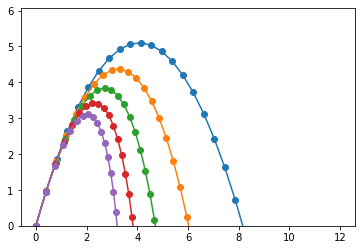

In [16]:
t = np.linspace(0, 3, 30)
for k in np.linspace(0, 1, 5):
    y = sint.odeint(f, y0, t, args=(k,))
    plt.plot(y[:,0], y[:,1], 'o-')
plt.ylim(0)

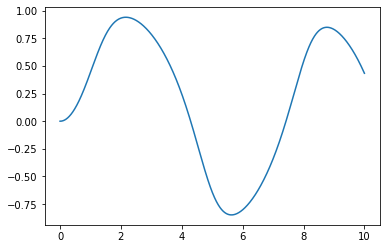

In [30]:
def f(x, t):
    return -x**3 + np.sin(t)
ts = np.linspace(0, 10, 1000)
h = ts[1]-ts[0]
x = 0
xs = np.zeros(1000)
for i, t in enumerate(ts):
    xs[i] = x
    x += h*f(x,t)

plt.plot(ts, xs)

In [37]:
def f(x, t):
    return -x**3 + np.sin(t)
def Euler(f, x, t, h):
    return x + h*f(x,t)
def RK2(f, x, t, h):
    k1 = h*f(x, t)
    k2 = h*f(x+0.5*k1, t+0.5*h)
    return x+k2
def RK4(f, x, t, h):
    k1 = h*f(x, t)
    k2 = h*f(x+0.5*k1, t+0.5*h)
    k3 = h*f(x+0.5*k2, t+0.5*h)
    k4 = h*f(x+k3, t+h)
    return x+ (k1+2*k2+2*k3+k4)/6.

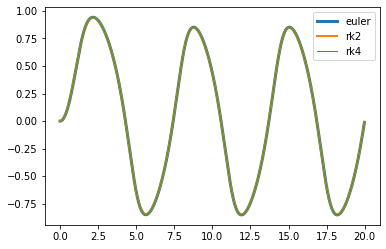

In [48]:
N = 1000
t = np.arange(0, 20, 20/N)
h = t[1]-t[0]
x1 = np.zeros(N)
x2 = np.zeros(N)
x3 = np.zeros(N)
for i in range (N-1):
    x1[i+1] = Euler(f, x1[i], t[i], h)
    x2[i+1] = RK2(f, x2[i], t[i], h)
    x3[i+1] = RK4(f, x3[i], t[i], h)
plt.plot(t, x1, lw = 3, label='euler')
plt.plot(t, x2, lw = 2, label='rk2')
plt.plot(t, x3, lw = 1, label='rk4')
plt.legend()